In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm count.
len(cities)

630

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | goulburn
Processing Record 5 of Set 1 | los andes
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mastic beach
Processing Record 9 of Set 1 | shuyskoye
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | ahuimanu
Processing Record 17 of Set 1 | nhulunbuy
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | sosnogorsk
Processing Record 20 of Set 1 | adrar
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | matagami
Processing Record 41 of Set 4 | matara
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | antofagasta
Processing Record 44 of Set 4 | akyab
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | comodoro rivadavia
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | yafran
Processing Record 1 of Set 5 | stornoway
Processing Record 2 of Set 5 | buala
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | sorland
Processing Record 5 of Set 5 | katangli
Processing Record 6 of Set 5 | muromtsevo
Processing Record 7 of Set 5 | aquiraz
Processing Record 8 of Set 5 | tonj
Processing Record 9 of Set 5 | mbekenyera
Processing Record 10 of Set 5 | iquique
Processing Record 11 of Set 5 | hadejia
Processing Record 12 of Set 5 | litovko

Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | dauphin
Processing Record 33 of Set 8 | muana
Processing Record 34 of Set 8 | moroto
Processing Record 35 of Set 8 | bowen
Processing Record 36 of Set 8 | busayra
Processing Record 37 of Set 8 | kodiak
Processing Record 38 of Set 8 | puerto madryn
Processing Record 39 of Set 8 | krasnyye baki
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | moose factory
Processing Record 42 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 43 of Set 8 | snasa
Processing Record 44 of Set 8 | kuche
City not found. Skipping...
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | hadzici
Processing Record 47 of Set 8 | lebu
Processing Record 48 of Set 8 | bonthe
Processing Record 49 of Set 8 | barcelos
Processing Record 50 of Set 8 | polunochnoye
Processing Record 1 of Set 9 | lavrentiya
Processing Record 2 of Set 9 | buncrana
Processing Record 3 of Set 9 | nizhneyansk


Processing Record 18 of Set 12 | guelengdeng
City not found. Skipping...
Processing Record 19 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 20 of Set 12 | bideford
Processing Record 21 of Set 12 | storm lake
Processing Record 22 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 23 of Set 12 | kerki
City not found. Skipping...
Processing Record 24 of Set 12 | koslan
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | kolosovka
Processing Record 27 of Set 12 | serafimovich
Processing Record 28 of Set 12 | pangnirtung
Processing Record 29 of Set 12 | amudat
Processing Record 30 of Set 12 | oyama
Processing Record 31 of Set 12 | funadhoo
Processing Record 32 of Set 12 | beyneu
Processing Record 33 of Set 12 | rockport
Processing Record 34 of Set 12 | medvezhyegorsk
Processing Record 35 of Set 12 | otradnoye
Processing Record 36 of Set 12 | palasa
Processing Record 37 of Set 12 | kayerkan
Processing 

In [7]:
len(city_data)

582

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,76.21,88,100,10.80,ID,2023-01-28 17:48:21
1,Busselton,-33.6500,115.3333,56.95,74,30,13.69,AU,2023-01-28 17:48:21
2,Rikitea,-23.1203,-134.9692,78.55,74,57,11.48,PF,2023-01-28 17:48:21
3,Goulburn,-34.7500,149.7167,68.52,64,83,4.38,AU,2023-01-28 17:48:22
4,Los Andes,-32.8337,-70.5983,88.29,16,0,8.63,CL,2023-01-28 17:48:22
5,Avarua,-21.2078,-159.7750,80.65,78,39,9.22,CK,2023-01-28 17:48:22
6,Ushuaia,-54.8000,-68.3000,60.42,51,20,26.46,AR,2023-01-28 17:45:22
7,Mastic Beach,40.7668,-72.8521,52.57,58,0,20.00,US,2023-01-28 17:48:23
8,Shuyskoye,59.3736,41.0305,8.26,96,57,6.15,RU,2023-01-28 17:48:23
9,Mar Del Plata,-38.0023,-57.5575,80.83,79,20,13.80,AR,2023-01-28 17:46:41


In [11]:
# Reorder the columns in the Dataframe
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2023-01-28 17:48:21,-3.8004,102.2655,76.21,88,100,10.80
1,Busselton,AU,2023-01-28 17:48:21,-33.6500,115.3333,56.95,74,30,13.69
2,Rikitea,PF,2023-01-28 17:48:21,-23.1203,-134.9692,78.55,74,57,11.48
3,Goulburn,AU,2023-01-28 17:48:22,-34.7500,149.7167,68.52,64,83,4.38
4,Los Andes,CL,2023-01-28 17:48:22,-32.8337,-70.5983,88.29,16,0,8.63
5,Avarua,CK,2023-01-28 17:48:22,-21.2078,-159.7750,80.65,78,39,9.22
6,Ushuaia,AR,2023-01-28 17:45:22,-54.8000,-68.3000,60.42,51,20,26.46
7,Mastic Beach,US,2023-01-28 17:48:23,40.7668,-72.8521,52.57,58,0,20.00
8,Shuyskoye,RU,2023-01-28 17:48:23,59.3736,41.0305,8.26,96,57,6.15
9,Mar Del Plata,AR,2023-01-28 17:46:41,-38.0023,-57.5575,80.83,79,20,13.80


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

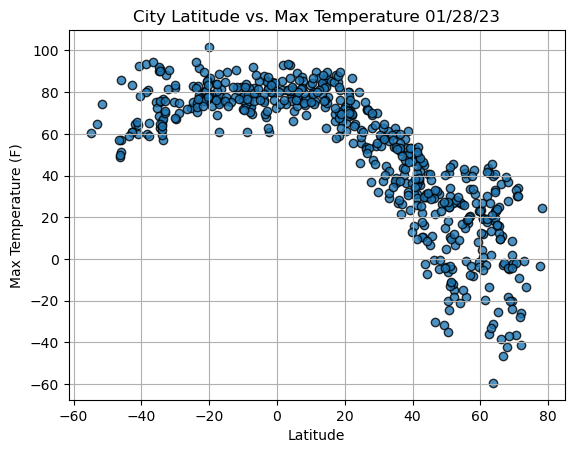

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1,
           marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

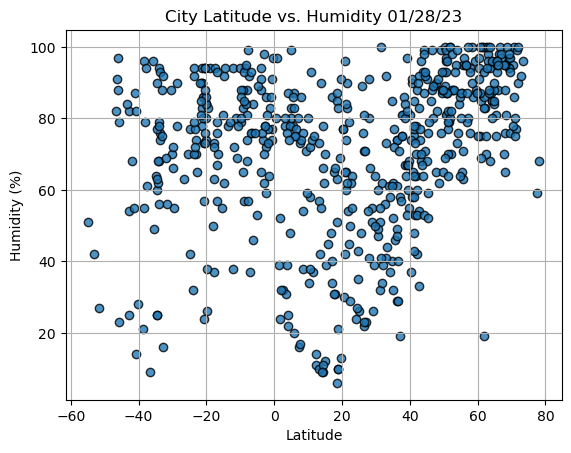

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1,
           marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

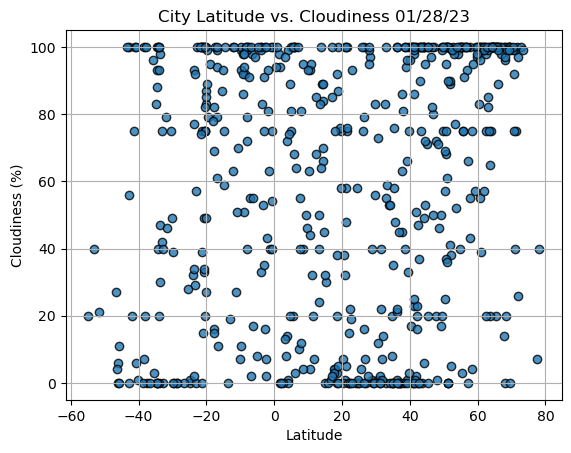

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1,
           marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

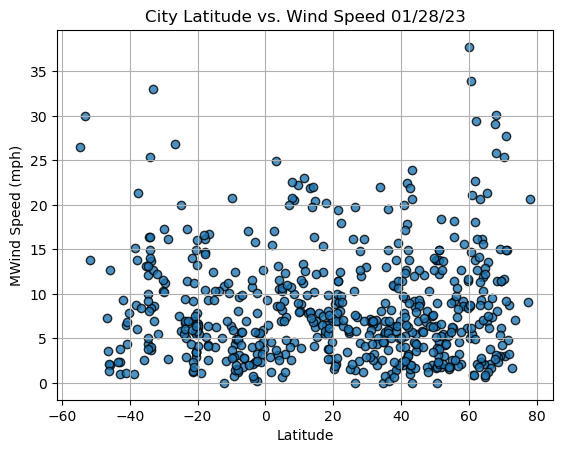

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1,
           marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("MWind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       Hasaki
Country                        JP
Date          2023-01-28 17:48:24
Lat                       35.7333
Lng                      140.8333
Max Temp                     27.0
Humidity                       46
Cloudiness                     48
Wind Speed                   13.0
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
577     True
578     True
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Mastic Beach,US,2023-01-28 17:48:23,40.7668,-72.8521,52.57,58,0,20.00
8,Shuyskoye,RU,2023-01-28 17:48:23,59.3736,41.0305,8.26,96,57,6.15
11,Beringovskiy,RU,2023-01-28 17:48:24,63.0500,179.3167,13.37,98,85,6.64
13,Hasaki,JP,2023-01-28 17:48:24,35.7333,140.8333,27.00,46,48,13.00
15,Ahuimanu,US,2023-01-28 17:48:25,21.4447,-157.8378,71.31,90,75,6.91


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

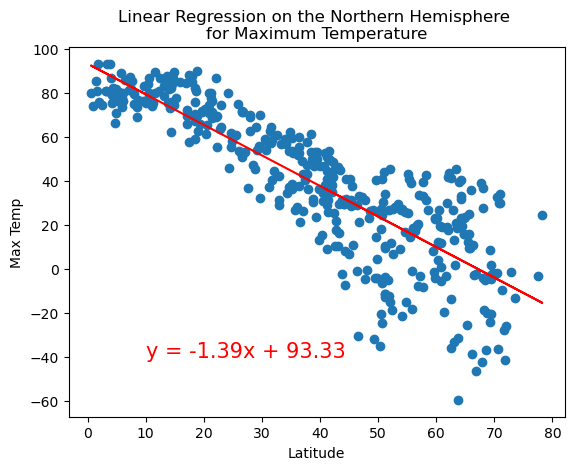

In [42]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(10,-40))

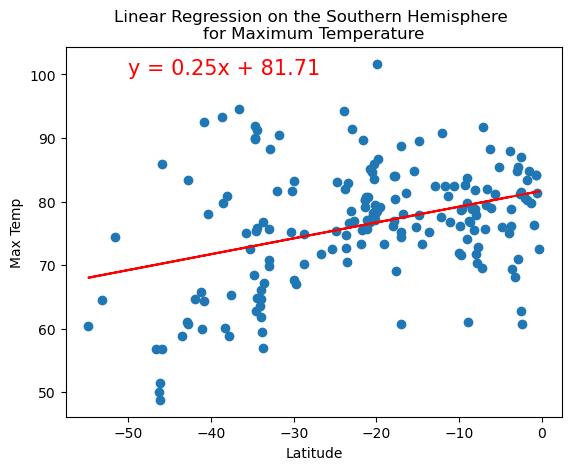

In [43]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,100))

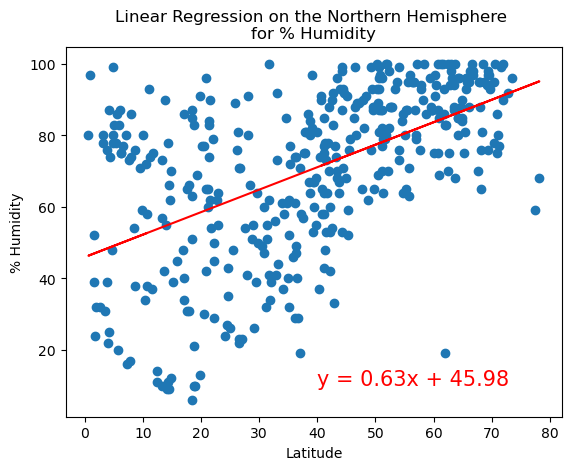

In [44]:
# Linear regression on the Northern Hemisphere for Humidty
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',(40,10))

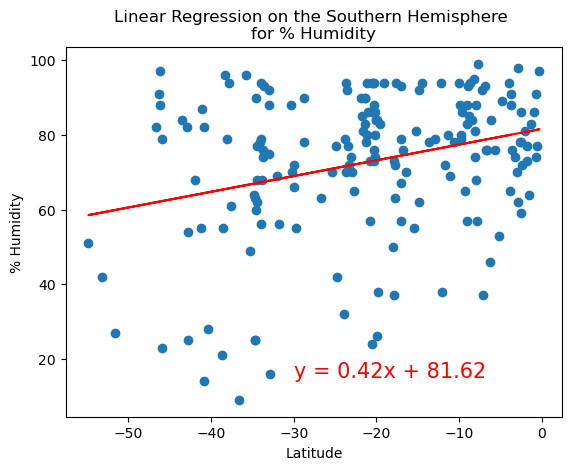

In [48]:
# Linear regression on the Southern Hemisphere for humidty
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',(-30,15))

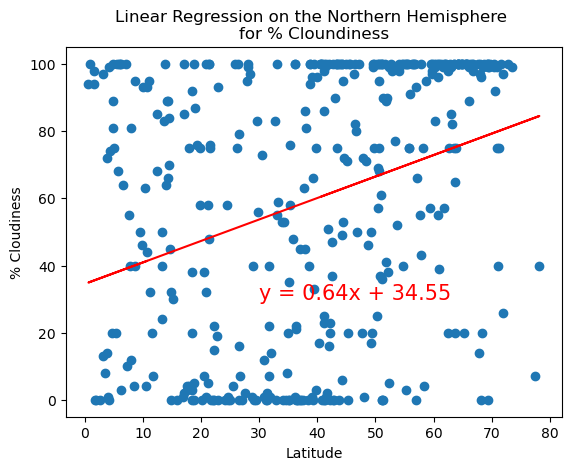

In [55]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloundiness', 
                       '% Cloudiness',(30,30))

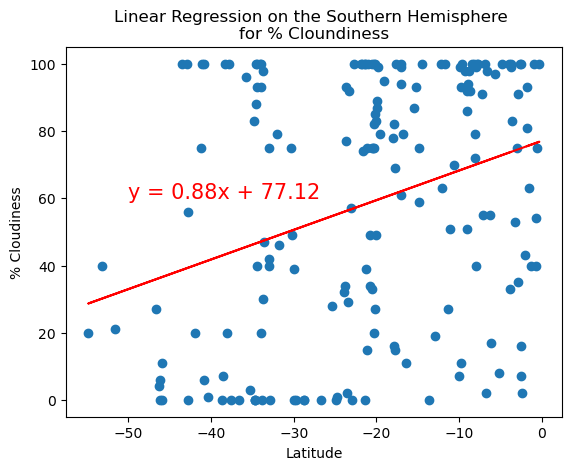

In [53]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloundiness', 
                       '% Cloudiness',(-50,60))

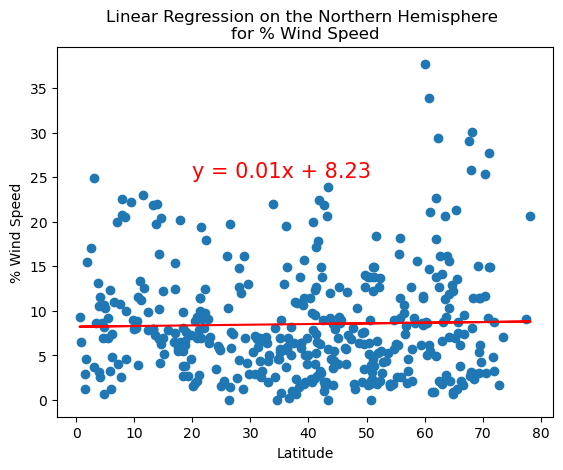

In [57]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Wind Speed', 
                       '% Wind Speed',(20,25))

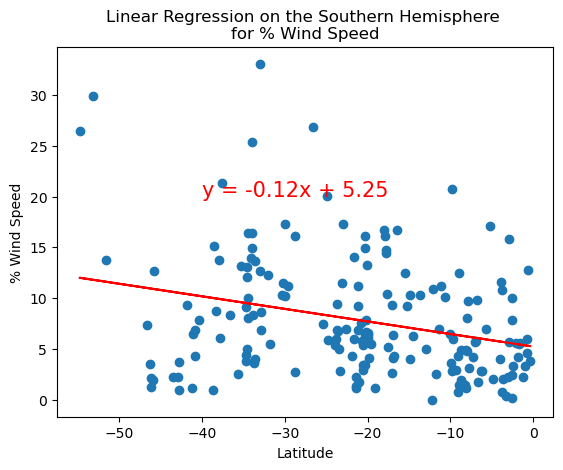

In [59]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Wind Speed', 
                       '% Wind Speed',(-40,20))